In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def initialize_data(n):
    """Function that generates and returns x, z, a given n"""
    x = np.random.randint(0,2,n)
    w = np.random.randint(0, 1, n)
    for i in range(len(x)):
        if np.random.random() < (2/3):
            w[i] = x[i]
        else:
            w[i] = 1-x[i]
        
    z = np.random.randint(0,2,n)
    a = []
    for i in range(n):
        a.append(sum(x[:i+1]) + z[i])
    return (w, x, z, a)

In [3]:
def run_algorithm(a, w=None):
    """Runs the algorithm with given a, and w if given"""
    n = len(a)
    x_sum = [-1]*n
    x = [-1]*n
    z = [-1]*n
    
    """If the first value in a is 0, the first x is zero"""
    if a[0] == 0:
        x_sum[0] = 0
        x[0] = 0
        z[0] = 0
        
    """If the first value in a is 0, the first x is zero"""
    if a[0] == 2:
        x_sum[0] = 1
        x[0] = 1
        z[0] = 1
        
    """Loop through the list going forwards to identify patterns and obtain information about the x sum's so far"""
    for i in range(1, n):
        
        """The case where a value in a is followed by a smaller value, e.g (6 5)"""
        if a[i] < a[i-1]:
            x_sum[i] = a[i]
            x_sum[i-1] = a[i]
            z[i-1] = 1
            z[i] = 0
            backstep = i-1
            """When we see the pattern (6 6 6 5), we know that since 5 follows 6, the corresponding x_sum values must be 5, 5, 
            and furthermore, each of the previous 6's must also be 5"""
            while True:
                if a[backstep] == a[i-1]:
                    x_sum[backstep] = x_sum[i-1]
                    z[backstep] = 1
                else:
                    break
                backstep -= 1
                
        """The case where the difference in values of a is 2, e.g (2,4)"""
        if a[i] - a[i-1] == 2:
            x_sum[i] = a[i] - 1
            x_sum[i-1] = a[i-1]
            z[i-1] = 0
            z[i] = 1
            backstep = i-1
            """When we see the pattern (1 2 3 5), we know that xsum_2=3, xsum_3=4, and we also know that xsum_0=1, xsum_2=2"""
            while True:
                if a[backstep] - a[backstep-1] == 1:
                    x_sum[backstep - 1] = x_sum[backstep] - 1
                    z[backstep] = 0
                else:
                    break
                backstep -= 1

        if z[i-1] == 1 and (a[i] - a[i-1]) == 1:
            x_sum[i] = x_sum[i-1] + 1
            z[i] = 1
        if z[i-1] == 0 and (a[i] - a[i-1]) == 0:
            x_sum[i] = x_sum[i-1]
            z[i] = 0
        if w is not None:
            if x_sum[i] == -1:
                x_sum[i] = x_sum[i-1] + w[i]
        
    for i in range(1, n):
        """using what we know from x_sum, we can figure out corresponding x's"""
        if (x_sum[i-1] != -1) and (x_sum[i] != -1):
            if x_sum[i] == x_sum[i-1]:
                x[i] = 0
            else:
                x[i] = 1
    
    for i in range(n):
        if x[i] == -1:
            """if the function is passed w, uses this to fill in the remaining x's that cannot be deduced"""
            if w is not None:
                x[i] = w[i]

            """for all the x's that have not been deduced, assumes that if a increments by 1, the corresponding x is 1, 0 otherwise"""
            if a[i-1] < a[i]:
                x[i] = 1
            else:
                x[i] = 0

    return np.array(x)

In [4]:
def find_acc(true_x, predicted_x):
    """Finds the proportion of predicted x's that are correct; i.e the accuracy of the prediction"""
    return np.mean(true_x == predicted_x)

In [5]:
def run_experiment(n):
    """Given n, generates vectors x, a, runs the attack and returns the accuracy"""
    accs = []
    for i in range(20):
        _, true_x,z,a = initialize_data(n)
        predicted_x = run_algorithm(a)
        acc = find_acc(true_x, predicted_x)
        accs.append(acc)
    mean_acc = np.mean(accs)
    std_acc = np.std(accs)
    # print(f"mean = {mean_acc}, std = {std_acc}")
    return mean_acc, std_acc

run_experiment(2000)

(0.7788999999999999, 0.011004090148667463)

In [6]:
def run_experiment_with_prior(n):
    """Given n, generates vectors x, a, w and runs the attack"""
    accs = []
    for i in range(20):
        w,true_x,z,a = initialize_data(n)
        predicted_x = run_algorithm(a, w)
        acc = find_acc(true_x, predicted_x)
        accs.append(acc)
    mean_acc = np.mean(accs)
    std_acc = np.std(accs)
#     print(f"mean = {mean_acc:.3f}, std = {std_acc:.3f}")
    return mean_acc, std_acc

run_experiment_with_prior(500)

(0.8059000000000001, 0.02827348581268322)

In [8]:
n_values = [100,500,1000,5000,50000]
accuracies_without_w_mean = []
accuracies_with_w_mean = []
accuracies_without_w_std = []
accuracies_with_w_std = []
for n in n_values:
    print(f"on iteration {n}")
    accuracy_without_w_mean, accuracy_without_w_std = run_experiment(n)
    print('.')
    accuracy_with_w_mean, accuracy_with_w_std = run_experiment_with_prior(n)
    accuracies_without_w_mean.append(accuracy_without_w_mean)
    accuracies_with_w_mean.append(accuracy_with_w_mean)
    accuracies_without_w_std.append(accuracy_without_w_std)
    accuracies_with_w_std.append(accuracy_with_w_std)
print(f"mean accuracies of attack run without w: {accuracies_without_w_mean}")
print(f"standard deviation of accuracies of attack run without w: {accuracies_without_w_std}")
print(f"mean accuracies of attack run with w: {accuracies_with_w_mean}")
print(f"standard deviation accuracies of attack run with w: {accuracies_with_w_std}")

on iteration 100
.
on iteration 500
.
on iteration 1000
.
on iteration 5000
.
on iteration 50000
.
mean accuracies of attack run without w: [0.8, 0.7718, 0.77785, 0.77789, 0.778219]
standard deviation of accuracies of attack run without w: [0.035496478698597685, 0.021127233609727517, 0.014107710657651026, 0.005539124479554492, 0.0018860379105415624]
mean accuracies of attack run with w: [0.772, 0.7979, 0.80465, 0.80555, 0.8061659999999999]
standard deviation accuracies of attack run with w: [0.03944616584663205, 0.021094786085665816, 0.011028485843487281, 0.006317871477008697, 0.0018566108908438456]


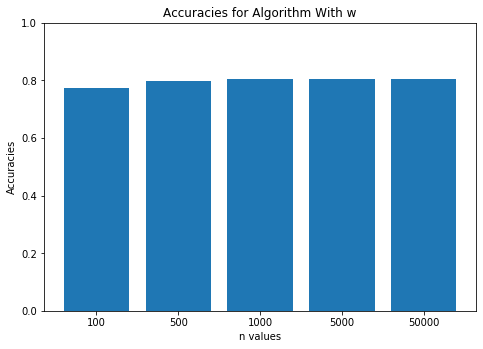

In [11]:
n_values = ['100','500','1000','5000','50000']
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(n_values, accuracies_with_w_mean)
ax.set_ylabel('Accuracies')
ax.set_xlabel('n values')
ax.set_title('Accuracies for Algorithm With w')
plt.ylim((0,1))
plt.show()

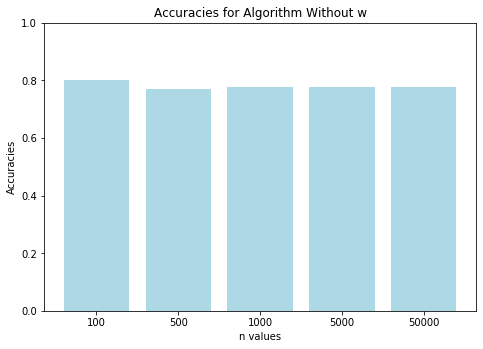

In [12]:
n_values = ['100','500','1000','5000','50000']
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(n_values, accuracies_without_w_mean, color='lightblue')
ax.set_ylabel('Accuracies')
ax.set_xlabel('n values')
ax.set_title('Accuracies for Algorithm Without w')
plt.ylim((0,1))
plt.show()

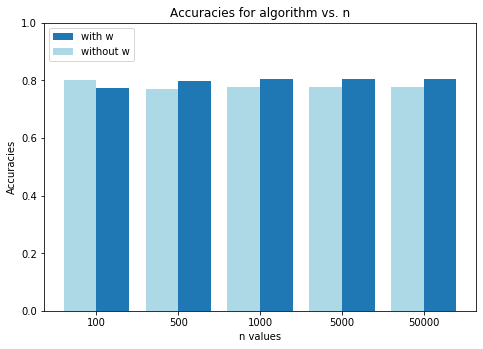

In [10]:
n_values = ['0', '100','500','1000','5000','50000']
fig = plt.figure()
x = np.arange(5)
ax = fig.add_axes([0,0,1,1])
ax.bar(x+0.2, accuracies_with_w_mean, width=0.4, label='with w')
ax.bar(x-0.2, accuracies_without_w_mean, color='lightblue', width=0.4, label='without w')
ax.set_ylabel('Accuracies')
ax.set_xlabel('n values')
ax.set_title('Accuracies for algorithm vs. n')
ax.set_xticklabels(n_values)
plt.legend(loc="upper left")
plt.ylim((0,1))
plt.show()

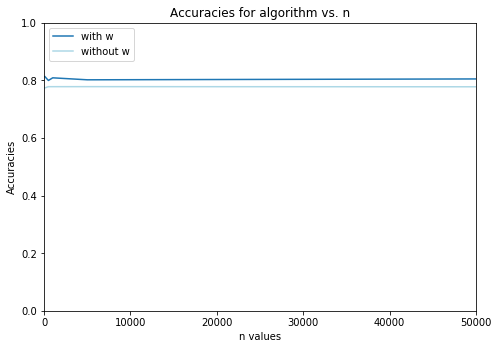

In [302]:
n_values = [100,500,1000,5000,50000]
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.plot(n_values, accuracies_with_w, label='with w')
ax.plot(n_values, accuracies_without_w, color='lightblue', label='without w')
ax.set_ylabel('Accuracies')
ax.set_xlabel('n values')
ax.set_title('Accuracies for algorithm vs. n')
plt.legend(loc="upper left")
plt.ylim((0,1))
plt.xlim((0,50000))
plt.show()